## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


In [16]:
print(x_train.shape)

(60000, 28, 28, 1)


In [22]:
import numpy as np
len(np.unique(x_train))

256

### Find no.of samples are there in training and test datasets

In [2]:
print(x_train.shape[0], 'train samples')

60000 train samples


In [3]:
print(x_test.shape[0], 'test samples')

10000 test samples


### Find dimensions of an image in the dataset

In [23]:
print(x_train.shape)

(60000, 28, 28, 1)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)

In [0]:
y_test = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:

x_train /= 255

In [0]:

x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [39]:
print(x_train.shape)

(60000, 28, 28, 1)


### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape

In [30]:

# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))
    
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, 
                                                 mode='auto')
callback_list = [early_stopping]

In [36]:
BATCH_SIZE = 32
EPOCHS = 10
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
            validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  768/60000 [..............................] - ETA: 13s - loss: 1.1530 - acc: 0.5990

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 11s 191us/step - loss: 0.3745 - acc: 0.8652 - val_loss: 0.2871 - val_acc: 0.8966
Epoch 2/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.2307 - acc: 0.9152 - val_loss: 0.2488 - val_acc: 0.9114
Epoch 3/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1633 - acc: 0.9390 - val_loss: 0.2497 - val_acc: 0.9123
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1155 - acc: 0.9571 - val_loss: 0.2710 - val_acc: 0.9108
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0734 - acc: 0.9726 - val_loss: 0.3111 - val_acc: 0.9128
Epoch 6/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0537 - acc: 0.9805 - val_loss: 0.3473 - val_acc: 0.9119
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0365 - acc: 0.9869 - val_loss: 0.3909 - val_acc: 0.9111
Epoch 8/10
60000/60000 [==============

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [41]:
    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [42]:

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, 
                                                 mode='auto')
callback_list = [early_stopping]
# Train the model
BATCH_SIZE = 32
EPOCHS = 10
model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
            validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.3915 - acc: 0.8590 - val_loss: 0.3271 - val_acc: 0.8811
Epoch 2/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.2594 - acc: 0.9041 - val_loss: 0.2439 - val_acc: 0.9104
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.2114 - acc: 0.9213 - val_loss: 0.2383 - val_acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.1781 - acc: 0.9344 - val_loss: 0.2265 - val_acc: 0.9207
Epoch 5/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.1506 - acc: 0.9439 - val_loss: 0.2279 - val_acc: 0.9203
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1285 - acc: 0.9517 - val_loss: 0.2412 - val_acc: 0.9185
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.1093 - acc: 0.9592 - val_loss: 0.

In [48]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

### Now, to the above model, lets add Data Augmentation 

In [0]:
 from keras.preprocessing.image import ImageDataGenerator

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

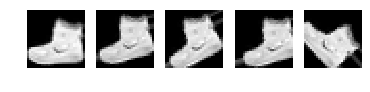

In [52]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [54]:
model3.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  16/1875 [..............................] - ETA: 20s - loss: 2.7721 - acc: 0.4258

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  """


1875/1875 [==============================] - 20s 10ms/step - loss: 0.7119 - acc: 0.7395 - val_loss: 0.3313 - val_acc: 0.8816
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5299 - acc: 0.8040 - val_loss: 0.3179 - val_acc: 0.8839
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4737 - acc: 0.8238 - val_loss: 0.3156 - val_acc: 0.8900
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4448 - acc: 0.8361 - val_loss: 0.3035 - val_acc: 0.8945
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4210 - acc: 0.8448 - val_loss: 0.3061 - val_acc: 0.8918
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4105 - acc: 0.8479 - val_loss: 0.3141 - val_acc: 0.8920
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3935 - acc: 0.8558 - val_loss: 0.2961 - val_acc: 0.8965
Epoch 8/10
1875/1875 [==============================] - 19s

###  Report the final train and validation accuracy

In [58]:
print("tarin accuracy is: ",0.8634)

tarin accuracy is:  0.8634


In [59]:
print("validation accuracy is: ",0.8932)

validation accuracy is:  0.8932


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
 from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_traincifar, y_traincifar), (x_testcifar, y_testcifar) = cifar10.load_data()

In [66]:
x_traincifar.shape

(50000, 32, 32, 3)

In [67]:


x_traincifar = x_traincifar.reshape(x_traincifar.shape[0], 32, 32, 3).astype('float32')
x_testcifar = x_testcifar.reshape(x_testcifar.shape[0], 32, 32, 3).astype('float32')
x_traincifar /= 255
x_testcifar /= 255
y_traincifar = np_utils.to_categorical(y_traincifar, 10)
y_testcifar = np_utils.to_categorical(y_testcifar, 10)

print('--- THE DATA ---')
print('x_train shape:', x_traincifar.shape)
print(x_traincifar.shape[0], 'train samples')
print(x_testcifar.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
def data_gen(image_rotation=50,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,):
  datagen = ImageDataGenerator(
  featurewise_center=False,  # set input mean to 0 over the dataset
  samplewise_center=False,  # set each sample mean to 0
  featurewise_std_normalization=False,  # divide inputs by std of the dataset
  samplewise_std_normalization=False,  # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range=image_rotation,  # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range=width_shift_range,  # randomly shift images horizontally (fraction of total width)
  height_shift_range=height_shift_range,  # randomly shift images vertically (fraction of total height)
  horizontal_flip=horizontal_flip,  # randomly flip images
  vertical_flip=False)  # randomly flip images
  datagen.fit(x_traincifar)

In [0]:
data_gen()

In [77]:
    # Define Model
    model4 = Sequential()

    # 1st Conv Layer
    model4.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model4.add(Activation('relu'))

    # 2nd Conv Layer
    model4.add(Convolution2D(32, 3, 3))
    model4.add(Activation('relu'))

    # Max Pooling
    model4.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model4.add(Dropout(0.25))

    # Fully Connected Layer
    model4.add(Flatten())
    model4.add(Dense(128))
    model4.add(Activation('relu'))
    
    # Prediction Layer
    model4.add(Dense(10))
    model4.add(Activation('softmax'))

    # Loss and Optimizer
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


### **Prepare/fit the generator.**

In [78]:
model4.fit_generator(datagen.flow(x_traincifar, y_traincifar,
                    batch_size=32),
                    samples_per_epoch=x_traincifar.shape[0],
                    nb_epoch=10,
                    validation_data=(x_testcifar, y_testcifar), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1562, epochs=10)`
  """


Epoch 1/10
1562/1562 [==============================] - 27s 17ms/step - loss: 1.6617 - acc: 0.3993 - val_loss: 1.3408 - val_acc: 0.5197
Epoch 2/10
1562/1562 [==============================] - 26s 17ms/step - loss: 1.4353 - acc: 0.4860 - val_loss: 1.2567 - val_acc: 0.5544
Epoch 3/10
1562/1562 [==============================] - 26s 17ms/step - loss: 1.3492 - acc: 0.5189 - val_loss: 1.2355 - val_acc: 0.5661
Epoch 4/10
1562/1562 [==============================] - 26s 17ms/step - loss: 1.3038 - acc: 0.5357 - val_loss: 1.1458 - val_acc: 0.5932
Epoch 5/10
1562/1562 [==============================] - 26s 17ms/step - loss: 1.2590 - acc: 0.5521 - val_loss: 1.1500 - val_acc: 0.5885
Epoch 6/10
1562/1562 [==============================] - 26s 17ms/step - loss: 1.2279 - acc: 0.5626 - val_loss: 1.0835 - val_acc: 0.6213
Epoch 7/10
1562/1562 [==============================] - 25s 16ms/step - loss: 1.2005 - acc: 0.5741 - val_loss: 1.2633 - val_acc: 0.5678
Epoch 8/10
1562/1562 [==========================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

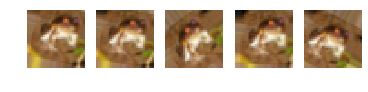

In [74]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_traincifar[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()